# Network Robustness
One of the example networks in the NetworkX library is the Karate club network.

* In this activity we explore how robust this network is.
* Here we take robust to mean, "How many connections can we delete without the network splitting in two?"
* You can think of this edge deleting process as failures in a network, or as social connections (friendships) breaking. How many connections need to break before the network splits?

## Load and draw the Karate Club network

* Run the code below to visualize the Karate Club network.

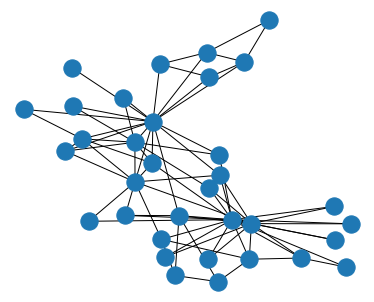

The Karate Club network has 34 nodes and 78 edges


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate the Karate club network
karate_graph = nx.karate_club_graph()

# The layout determines where the nodes will be displayed on the plot.
# We fix the random seed so the layout is the same every time you see
# the network below.
layout = nx.spring_layout(karate_graph, seed=1)

# Plot the network
plt.figure(figsize=(5, 4))
nx.draw(karate_graph, pos=layout)
plt.show()

print(f'The Karate Club network has {karate_graph.number_of_nodes()} nodes '
      f'and {karate_graph.number_of_edges()} edges')

## Delete random edges from the network

* Read and understand the code below.
* Run the code to see what happens.
* You can run the second cell below multiple times – it will produce different random results every time.

In [10]:
# Here is how we delete a random edge from the network

def delete_random_edge(graph):
    import random

    # Choose a random edge
    edge = random.choice(list(graph.edges))

    # Remove the chosen edge from the network by specifying the two nodes
    graph.remove_edge(edge[0], edge[1])

    # We return the edge that was deleted so we can visualize it later
    return edge

The network split after deleting 14 edges


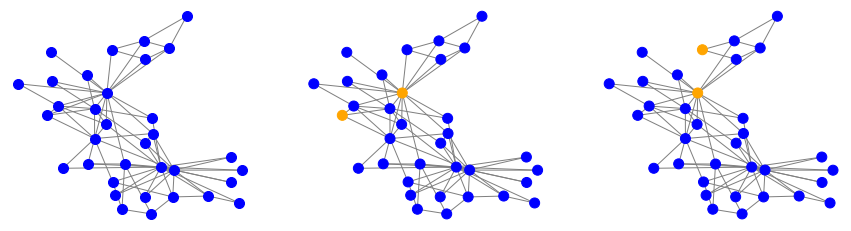

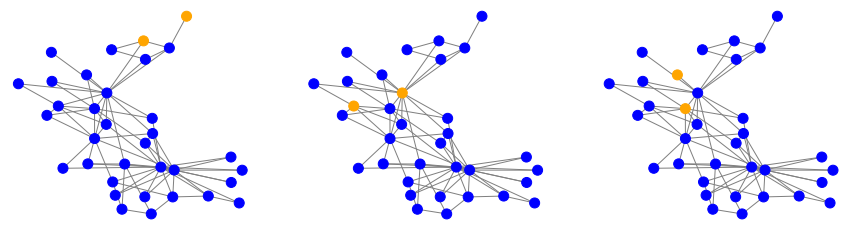

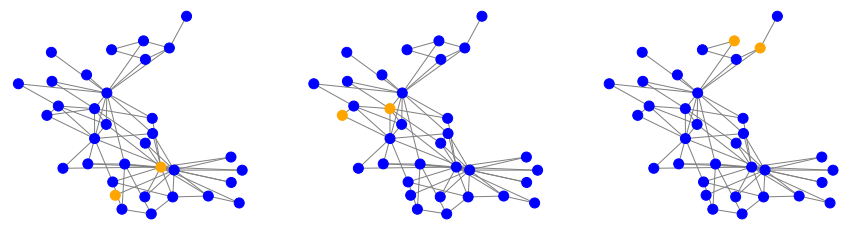

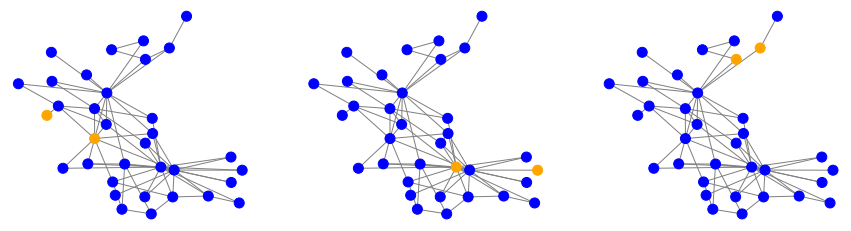

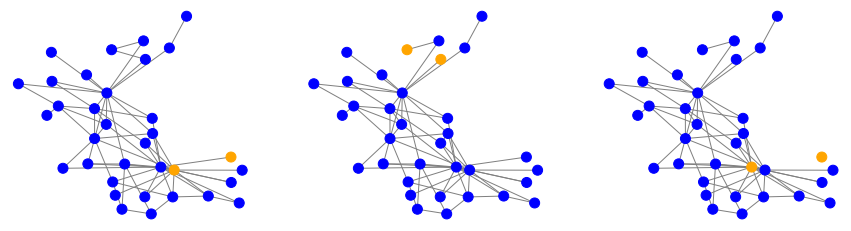

In [11]:
# Delete random edges from the network until it splits in two. Since this
# process is random, you will get different results every time you run it.

karate_graph = nx.karate_club_graph()
layout = nx.spring_layout(karate_graph, seed=1)

# We visualize the network after every edge deletion
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
nx.draw(karate_graph, pos=layout, node_size=100,
        edge_color='grey', node_color='blue')

# We delete edges until we have more than one "connected component" in the
# network – that is until it splits in two.
delete_count = 0
while nx.number_connected_components(karate_graph) == 1:
    edge = delete_random_edge(karate_graph)
    delete_count += 1

    # Visualize the network after every step
    if delete_count % 3 == 0:
        plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, delete_count % 3 + 1)

    # Make the two nodes of the edge that was just deleted orange
    node_colors = ['blue'] * karate_graph.number_of_nodes()
    node_colors[edge[0]] = 'orange'
    node_colors[edge[1]] = 'orange'
    nx.draw(karate_graph, pos=layout, node_size=100,
            edge_color='grey', node_color=node_colors)

print(f'The network split after deleting {delete_count} edges')

## Task 1
Reuse the code above to get a distribution over the number of random edge deletions needed to split the network in two. You will need to run the edge deletion process above on the same network multiple times.

<span class="minerva-question" style='background-color:#5cb85c;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Task 1a</span>

* Create a function call `run_experiment` that will repeat the edge deletion process above multiple times and record how many edges had to be deleted to split the network.

In [12]:
def run_experiment(graph, trials=1000):
    results = np.zeros(trials)
    for t in range(trials):

        count = 0
        g = graph.copy()
        while nx.number_connected_components(g) == 1:
            delete_random_edge(g)
            count += 1

        results[t] = count


    return results

<span class="minerva-question" style='background-color:#5cb85c;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Task 1b</span>

* Plot a histogram of the results for the Karate Club network.

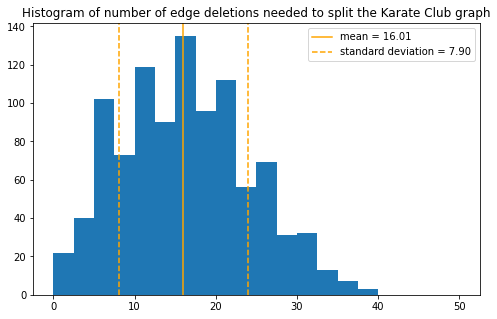

In [13]:
counts = run_experiment(nx.karate_club_graph())
mean = np.mean(counts)
stdev = np.std(counts)

plt.figure(figsize=(8, 5))
plt.title('Histogram of number of edge deletions needed to split the Karate Club graph')

plt.hist(counts, range=[0, 50], bins=20)
plt.axvline(mean, color='orange',
            label=f'mean = {mean:.2f}')
plt.axvline(mean + stdev, color='orange', linestyle='--',
            label=f'standard deviation = {stdev:.2f}')
plt.axvline(mean - stdev, color='orange', linestyle='--')

plt.legend()
plt.show()

<span class="minerva-question" style='background-color:#5cb85c;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Task 1c</span>

* Compute the average number of edge deletions needed to split the network.

The average number of edge deletions to split the network provides an estimate of the robustness of the network. The more edges we have to delete to split the network, the more robust it is.

In [14]:
# YOUR CODE HERE

### Task 2
Now compare how robust a random network with roughly the same number of nodes an edges as the Karate Club network is. Is the Karate Club network more or less robust than a random network?

Below is some code to get you started with generating a random network. For now, you do not need to know what exactly a Erdős-Rényi random network is – just that it is random. We will learn more about Erdős-Rényi networks later in the course.

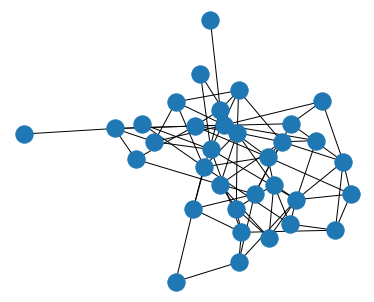

The random network has 34 nodes and 78 edges


In [15]:
# Generate an Erdős-Rényi random network with the same number of nodes and
# edges as the Karate Club nework
karate_graph = nx.karate_club_graph()
while True:
    random_graph = nx.erdos_renyi_graph(34, 0.139)
    if random_graph.number_of_edges() == karate_graph.number_of_edges():
        break

# Plot the network
plt.figure(figsize=(5, 4))
nx.draw(random_graph)
plt.show()

print(f'The random network has {random_graph.number_of_nodes()} nodes '
      f'and {random_graph.number_of_edges()} edges')

<span class="minerva-question"></span>

* Repeat the edge deletion experiment for the random network and record the results.
* Plot a histogram of the results.
* Compute the average number of edge deletions needed to split the random network.

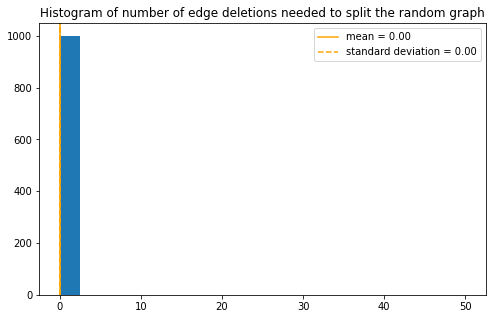

In [16]:
karate_graph = nx.karate_club_graph()
while True:
    random_graph = nx.erdos_renyi_graph(34, 0.139)
    if random_graph.number_of_edges() == karate_graph.number_of_edges():
        break

counts = run_experiment(random_graph)
mean = np.mean(counts)
stdev = np.std(counts)

plt.figure(figsize=(8, 5))
plt.title('Histogram of number of edge deletions needed to split the random graph')

plt.hist(counts, range=[0, 50], bins=20)
plt.axvline(mean, color='orange',
            label=f'mean = {mean:.2f}')
plt.axvline(mean + stdev, color='orange', linestyle='--',
            label=f'standard deviation = {stdev:.2f}')
plt.axvline(mean - stdev, color='orange', linestyle='--')

plt.legend()
plt.show()

<span class="minerva-question" style='background-color:#5cb85c;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question</span>

Which graph is more robust – the Karate club graph or the random graph? Is it much more robust or just a little? Why do you think this is the case?